In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot

%matplotlib inline

In [9]:
df = pd.read_csv('spinal_data.csv', index_col=None)

## Feature selection

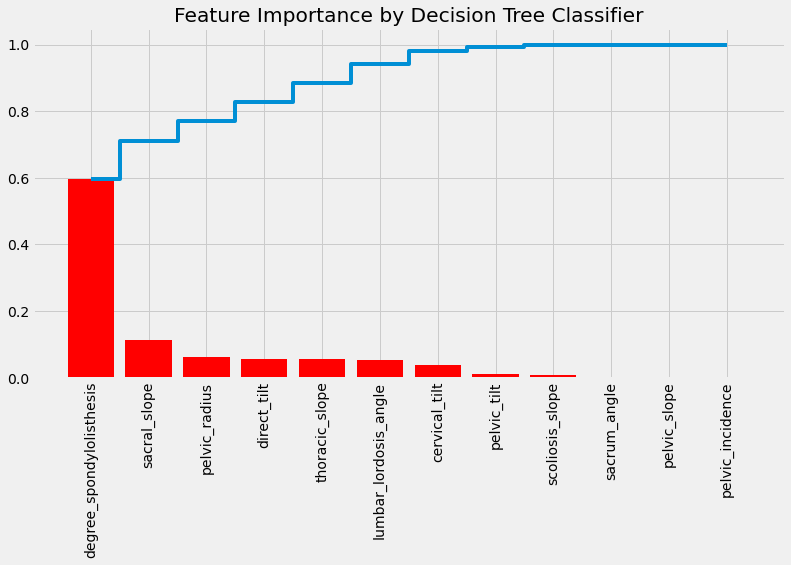

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)


# Assign 'status' as target variable
target_name = 'status'

# Assign features
X = df.drop('status', axis=1)


y=df[target_name]

#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

#Use Decision Tree Classifier
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['status'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importance by Decision Tree Classifier")
plt.bar(range(len(indices)), importances[indices], color='red',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## Modelling

In [45]:
#Calling and importing the libraries to fit the Support Vector Machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print ("\n\n ---SVC Model---")
ada_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
print ("SVC AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, svc.predict(X_test)))



 ---SVC Model---
SVC AUC = 0.73
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.79      0.79      0.79        19

    accuracy                           0.74        31
   macro avg       0.73      0.73      0.73        31
weighted avg       0.74      0.74      0.74        31



In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)



C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train.ravel())

y_gb=gb_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.82      0.88      0.85        32

    accuracy                           0.79        47
   macro avg       0.76      0.74      0.75        47
weighted avg       0.78      0.79      0.78        47



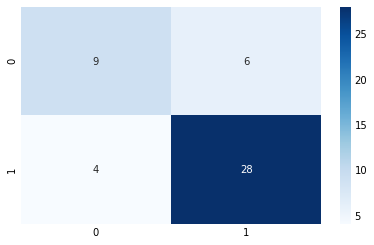

In [28]:
gb_matrix=confusion_matrix(y_test, y_gb)
sns.heatmap(gb_matrix, annot=True, cmap='Blues')
print(classification_report(y_test, y_gb))

In [29]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [31]:
y = df['status'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Cross Validation

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_model_train, X_validation, y_model_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
print ('Model train set:', X_model_train.shape,  y_model_train.shape)
print ('Validation (hyperparameters test) set:', X_validation.shape,  y_validation.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Model train set: (251, 12) (251,)
Validation (hyperparameters test) set: (28, 12) (28,)
Test set: (31, 12) (31,)


In [33]:
def train_tree_with_validation():
    f1_scores = {}
    max_depth = range(1,20)
    impurity_decrease = [0.1,0.01,0.001,0.0001,0]
    for d in max_depth:
        for i in impurity_decrease:
            dTree = DecisionTreeClassifier(criterion="gini", max_depth = d, min_impurity_decrease=i)
            dTree.fit(X_model_train,y_model_train)
            f1_scores[(d,i)] = f1_score(y_validation, dTree.predict(X_validation))
    return max(f1_scores.keys(), key=(lambda key: f1_scores[key]))

In [34]:
best_hyper_values = train_tree_with_validation()
dTree = DecisionTreeClassifier(criterion="gini", max_depth = best_hyper_values[0], min_impurity_decrease=best_hyper_values[1])
dTree.fit(X_train,y_train)
print('Trained a decision tree with max_depth = {} and min_impurity_decrease = {}'.format(best_hyper_values[0],best_hyper_values[1]))
print('F1 score on test set: {:.3}'.format(f1_score(y_test, dTree.predict(X_test), average='weighted')))

Trained a decision tree with max_depth = 2 and min_impurity_decrease = 0.01
F1 score on test set: 0.677


In [35]:
dTree = DecisionTreeClassifier(criterion="gini", max_depth = 4, min_impurity_decrease=0.01)
dTree.fit(X_train,y_train)
print('F1 score with max_depth=4 on the test set: {:.3}'.format(f1_score(y_test, dTree.predict(X_test), average='weighted')))

F1 score with max_depth=4 on the test set: 0.712


In [36]:
#Calling and importing the libraries to fit the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
# Checking accuracy on our test and train datasets
from sklearn.metrics import accuracy_score
print('Random Forest Classifier Train accuracy: {:.3f}'.format(accuracy_score(y_train, rf.predict(X_train))))
print('Random Forest Classifier Test accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Classifier Train accuracy: 1.000
Random Forest Classifier Test accuracy: 0.742


In [38]:
# Printing Precision and Recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.76      0.84      0.80        19

    accuracy                           0.74        31
   macro avg       0.73      0.71      0.72        31
weighted avg       0.74      0.74      0.74        31



In [39]:
#Calling and importing the libraries to fit the Support Vector Machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [40]:
# Checking accuracy on our test and train datasets

print('Support Vector Machine Train accuracy: {:.3f}'.format(accuracy_score(y_train, svc.predict(X_train))))
print('Support Vector Machine Test accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))


Support Vector Machine Train accuracy: 0.864
Support Vector Machine Test accuracy: 0.742


In [41]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.79      0.79      0.79        19

    accuracy                           0.74        31
   macro avg       0.73      0.73      0.73        31
weighted avg       0.74      0.74      0.74        31



In [42]:
#Calling and importing the libraries to fit the Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
# Checking accuracy on our test and train datasets

print('Gradient Boosting Classifier Train accuracy: {:.3f}'.format(accuracy_score(y_train, gb.predict(X_train))))
print('Gradient Boosting Classifier Test accuracy: {:.3f}'.format(accuracy_score(y_test, gb.predict(X_test))))

Gradient Boosting Classifier Train accuracy: 1.000
Gradient Boosting Classifier Test accuracy: 0.742


In [44]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.74      0.89      0.81        19

    accuracy                           0.74        31
   macro avg       0.74      0.70      0.70        31
weighted avg       0.74      0.74      0.73        31



In [46]:
#Calling and importing the libraries to fit the Gradient Boosting Classifier model
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [47]:
# Checking accuracy on our test and train datasets

print('Logistic Regression Train accuracy: {:.3f}'.format(accuracy_score(y_train, logis.predict(X_train))))
print('Logistic Regression Test accuracy: {:.3f}'.format(accuracy_score(y_test, logis.predict(X_test))))

Logistic Regression Train accuracy: 0.867
Logistic Regression Test accuracy: 0.774


In [48]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.74      0.89      0.81        19

    accuracy                           0.74        31
   macro avg       0.74      0.70      0.70        31
weighted avg       0.74      0.74      0.73        31

